# Destacando subestruturas com o RDKit

Este é um Notebook simples, baseado no [Cookbook](https://www.rdkit.org/docs/Cookbook.html#highlight-a-substructure-in-a-molecule) do `RDKit`, em que demonstraremos como destacar (*highlight*) uma subestrutura em uma estrutura química. Isso pode ser útil para destacar:
- A parte de uma substância química responsável por certa atividade ou toxicidade
- Um ponto de metabolismo
- Uma [subestrutura indesejada](https://github.com/rflameiro/Python_e_Quiminformatica/blob/main/Quiminformatica/Filtros%20-%20PAINS.ipynb)
- Um *scaffold* em comum com outros compostos de uma série

Aqui, vamos mostrar alguns exemplos usando SMARTS. Em outros Notebooks, como o de [*R-group decomposition*](), vamos usar diferentes estratégias para selecionar e destacar subestruturas relevantes.

In [1]:
import rdkit
print(rdkit.__version__)
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

2022.03.3


Começamos criando uma molécula a partir do SMILES (objeto RDKit Mol).

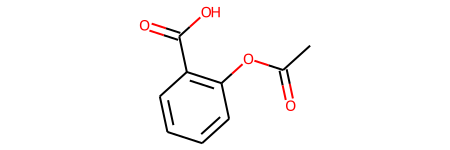

In [2]:
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')
m

Vamos ver a numeração dos átomos atribuída pelo RDKit:

In [3]:
def addAtomIndices(mol):
    for i, a in enumerate(mol.GetAtoms()):
        a.SetAtomMapNum(i)

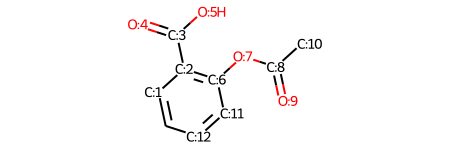

In [4]:
addAtomIndices(m)
m

O átomo não numerado corresponde ao índice 0.

Agora, criamos uma subestrutura usando SMARTS:

In [5]:
# Definimos m novamente para remover a numeração
m = Chem.MolFromSmiles('c1cc(C(=O)O)c(OC(=O)C)cc1')

# Definimos a subestrutura desejada: carboxila
substructure = Chem.MolFromSmarts('C(=O)O')

# Esta linha mostra os números dos átomos do RDKit Mol que
# correspondem à subestrutura
print(m.GetSubstructMatches(substructure))

((3, 4, 5), (8, 9, 7))


Veja que temos dois *matches*, pois a estrutura apresenta duas carboxilas. 

Agora, basta chamar o objeto RDKit Mol, e as subestruturas já aparecem destacadas.

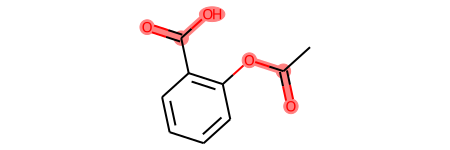

In [6]:
m

Tanto a carboxila do éster quanto a do ácido carboxílico foram destacadas.

Também podemos selecionar os átomos a serem destacados pelos seus números. Aqui, vamos destacar o anel aromático.

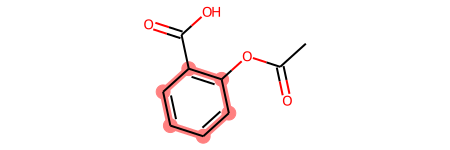

In [7]:
m.__sssAtoms = [0,1,2,6,11,12]
m